In [93]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [94]:
Ab_data = pd.read_csv('Absenteeism_at_work.csv',sep=';')
Ab_data.head()

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,...,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
0,11,26,7,3,1,289,36,13,33,239.554,...,0,1,2,1,0,1,90,172,30,4
1,36,0,7,3,1,118,13,18,50,239.554,...,1,1,1,1,0,0,98,178,31,0
2,3,23,7,4,1,179,51,18,38,239.554,...,0,1,0,1,0,0,89,170,31,2
3,7,7,7,5,1,279,5,14,39,239.554,...,0,1,2,1,1,0,68,168,24,4
4,11,23,7,5,1,289,36,13,33,239.554,...,0,1,2,1,0,1,90,172,30,2


### Data Dictionary 
1. Individual identification (ID)
2. Reason for absence (ICD).
Absences attested by the International Code of Diseases (ICD) stratified into 21 categories (I to XXI) as follows:

I Certain infectious and parasitic diseases  
II Neoplasms  
III Diseases of the blood and blood-forming organs and certain disorders involving the immune mechanism  
IV Endocrine, nutritional and metabolic diseases  
V Mental and behavioural disorders  
VI Diseases of the nervous system  
VII Diseases of the eye and adnexa  
VIII Diseases of the ear and mastoid process  
IX Diseases of the circulatory system  
X Diseases of the respiratory system  
XI Diseases of the digestive system  
XII Diseases of the skin and subcutaneous tissue  
XIII Diseases of the musculoskeletal system and connective tissue  
XIV Diseases of the genitourinary system  
XV Pregnancy, childbirth and the puerperium  
XVI Certain conditions originating in the perinatal period  
XVII Congenital malformations, deformations and chromosomal abnormalities  
XVIII Symptoms, signs and abnormal clinical and laboratory findings, not elsewhere classified  

XIX Injury, poisoning and certain other consequences of external causes  
XX External causes of morbidity and mortality  
XXI Factors influencing health status and contact with health services.

And 7 categories without (CID) patient follow-up (22), medical consultation (23), blood donation (24), laboratory examination (25), unjustified absence (26), physiotherapy (27), dental consultation (28).
3. Month of absence
4. Day of the week (Monday (2), Tuesday (3), Wednesday (4), Thursday (5), Friday (6))
5. Seasons
6. Transportation expense
7. Distance from Residence to Work (kilometers)
8. Service time
9. Age
10. Work load Average/day 
11. Hit target
12. Disciplinary failure (yes=1; no=0)
13. Education (high school (1), graduate (2), postgraduate (3), master and doctor (4))
14. Son (number of children)
15. Social drinker (yes=1; no=0)
16. Social smoker (yes=1; no=0)
17. Pet (number of pet)
18. Weight
19. Height
20. Body mass index
21. Absenteeism time in hours (target)



In [10]:
Ab_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 740 entries, 0 to 739
Data columns (total 21 columns):
ID                                 740 non-null int64
Reason for absence                 740 non-null int64
Month of absence                   740 non-null int64
Day of the week                    740 non-null int64
Seasons                            740 non-null int64
Transportation expense             740 non-null int64
Distance from Residence to Work    740 non-null int64
Service time                       740 non-null int64
Age                                740 non-null int64
Work load Average/day              740 non-null float64
Hit target                         740 non-null int64
Disciplinary failure               740 non-null int64
Education                          740 non-null int64
Son                                740 non-null int64
Social drinker                     740 non-null int64
Social smoker                      740 non-null int64
Pet                          

### To check if the dataset contains missing values

In [11]:
Ab_data.isnull().sum()

ID                                 0
Reason for absence                 0
Month of absence                   0
Day of the week                    0
Seasons                            0
Transportation expense             0
Distance from Residence to Work    0
Service time                       0
Age                                0
Work load Average/day              0
Hit target                         0
Disciplinary failure               0
Education                          0
Son                                0
Social drinker                     0
Social smoker                      0
Pet                                0
Weight                             0
Height                             0
Body mass index                    0
Absenteeism time in hours          0
dtype: int64

### DATA PREPARATION

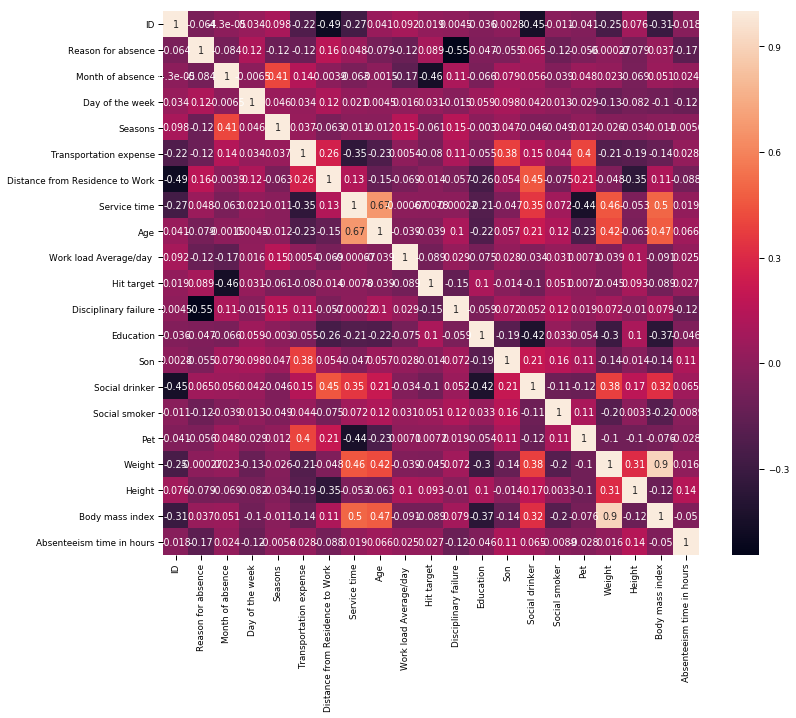

In [97]:
plt.figure(figsize=(12,10))
sns.set_context(context='paper')
sns.heatmap(Ab_data.corr(),annot=True)
#Checking if there is correlation between the features against the Absenteeism in hours column

In [12]:
Ab_data.drop(['Month of absence','Day of the week','Seasons','Weight','Height','Hit target'], 1, inplace = True)

### DATA VISUALIZATION



In [13]:
Ab_data.head()

,ID,Reason for absence,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Body mass index,Absenteeism time in hours
0,11,26,289,36,13,33,239.554,0,1,2,1,0,1,30,4
1,36,0,118,13,18,50,239.554,1,1,1,1,0,0,31,0
2,3,23,179,51,18,38,239.554,0,1,0,1,0,0,31,2
3,7,7,279,5,14,39,239.554,0,1,2,1,1,0,24,4
4,11,23,289,36,13,33,239.554,0,1,2,1,0,1,30,2


In [14]:
Ab_data.describe()

,ID,Reason for absence,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Body mass index,Absenteeism time in hours
count,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000
mean,18.017568,19.216216,221.329730,29.631081,12.554054,36.450000,271.490235,0.054054,1.291892,1.018919,0.567568,0.072973,0.745946,26.677027,6.924324
std,11.021247,8.433406,66.952223,14.836788,4.384873,6.478772,39.058116,0.226277,0.673238,1.098489,0.495749,0.260268,1.318258,4.285452,13.330998
min,1.000000,0.000000,118.000000,5.000000,1.000000,27.000000,205.917000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,19.000000,0.000000
25%,9.000000,13.000000,179.000000,16.000000,9.000000,31.000000,244.387000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,24.000000,2.000000
50%,18.000000,23.000000,225.000000,26.000000,13.000000,37.000000,264.249000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,25.000000,3.000000
75%,28.000000,26.000000,260.000000,50.000000,16.000000,40.000000,294.217000,0.000000,1.000000,2.000000,1.000000,0.000000,1.000000,31.000000,8.000000
max,36.000000,28.000000,388.000000,52.000000,29.000000,58.000000,378.884000,1.000000,4.000000,4.000000,1.000000,1.000000,8.000000,38.000000,120.000000


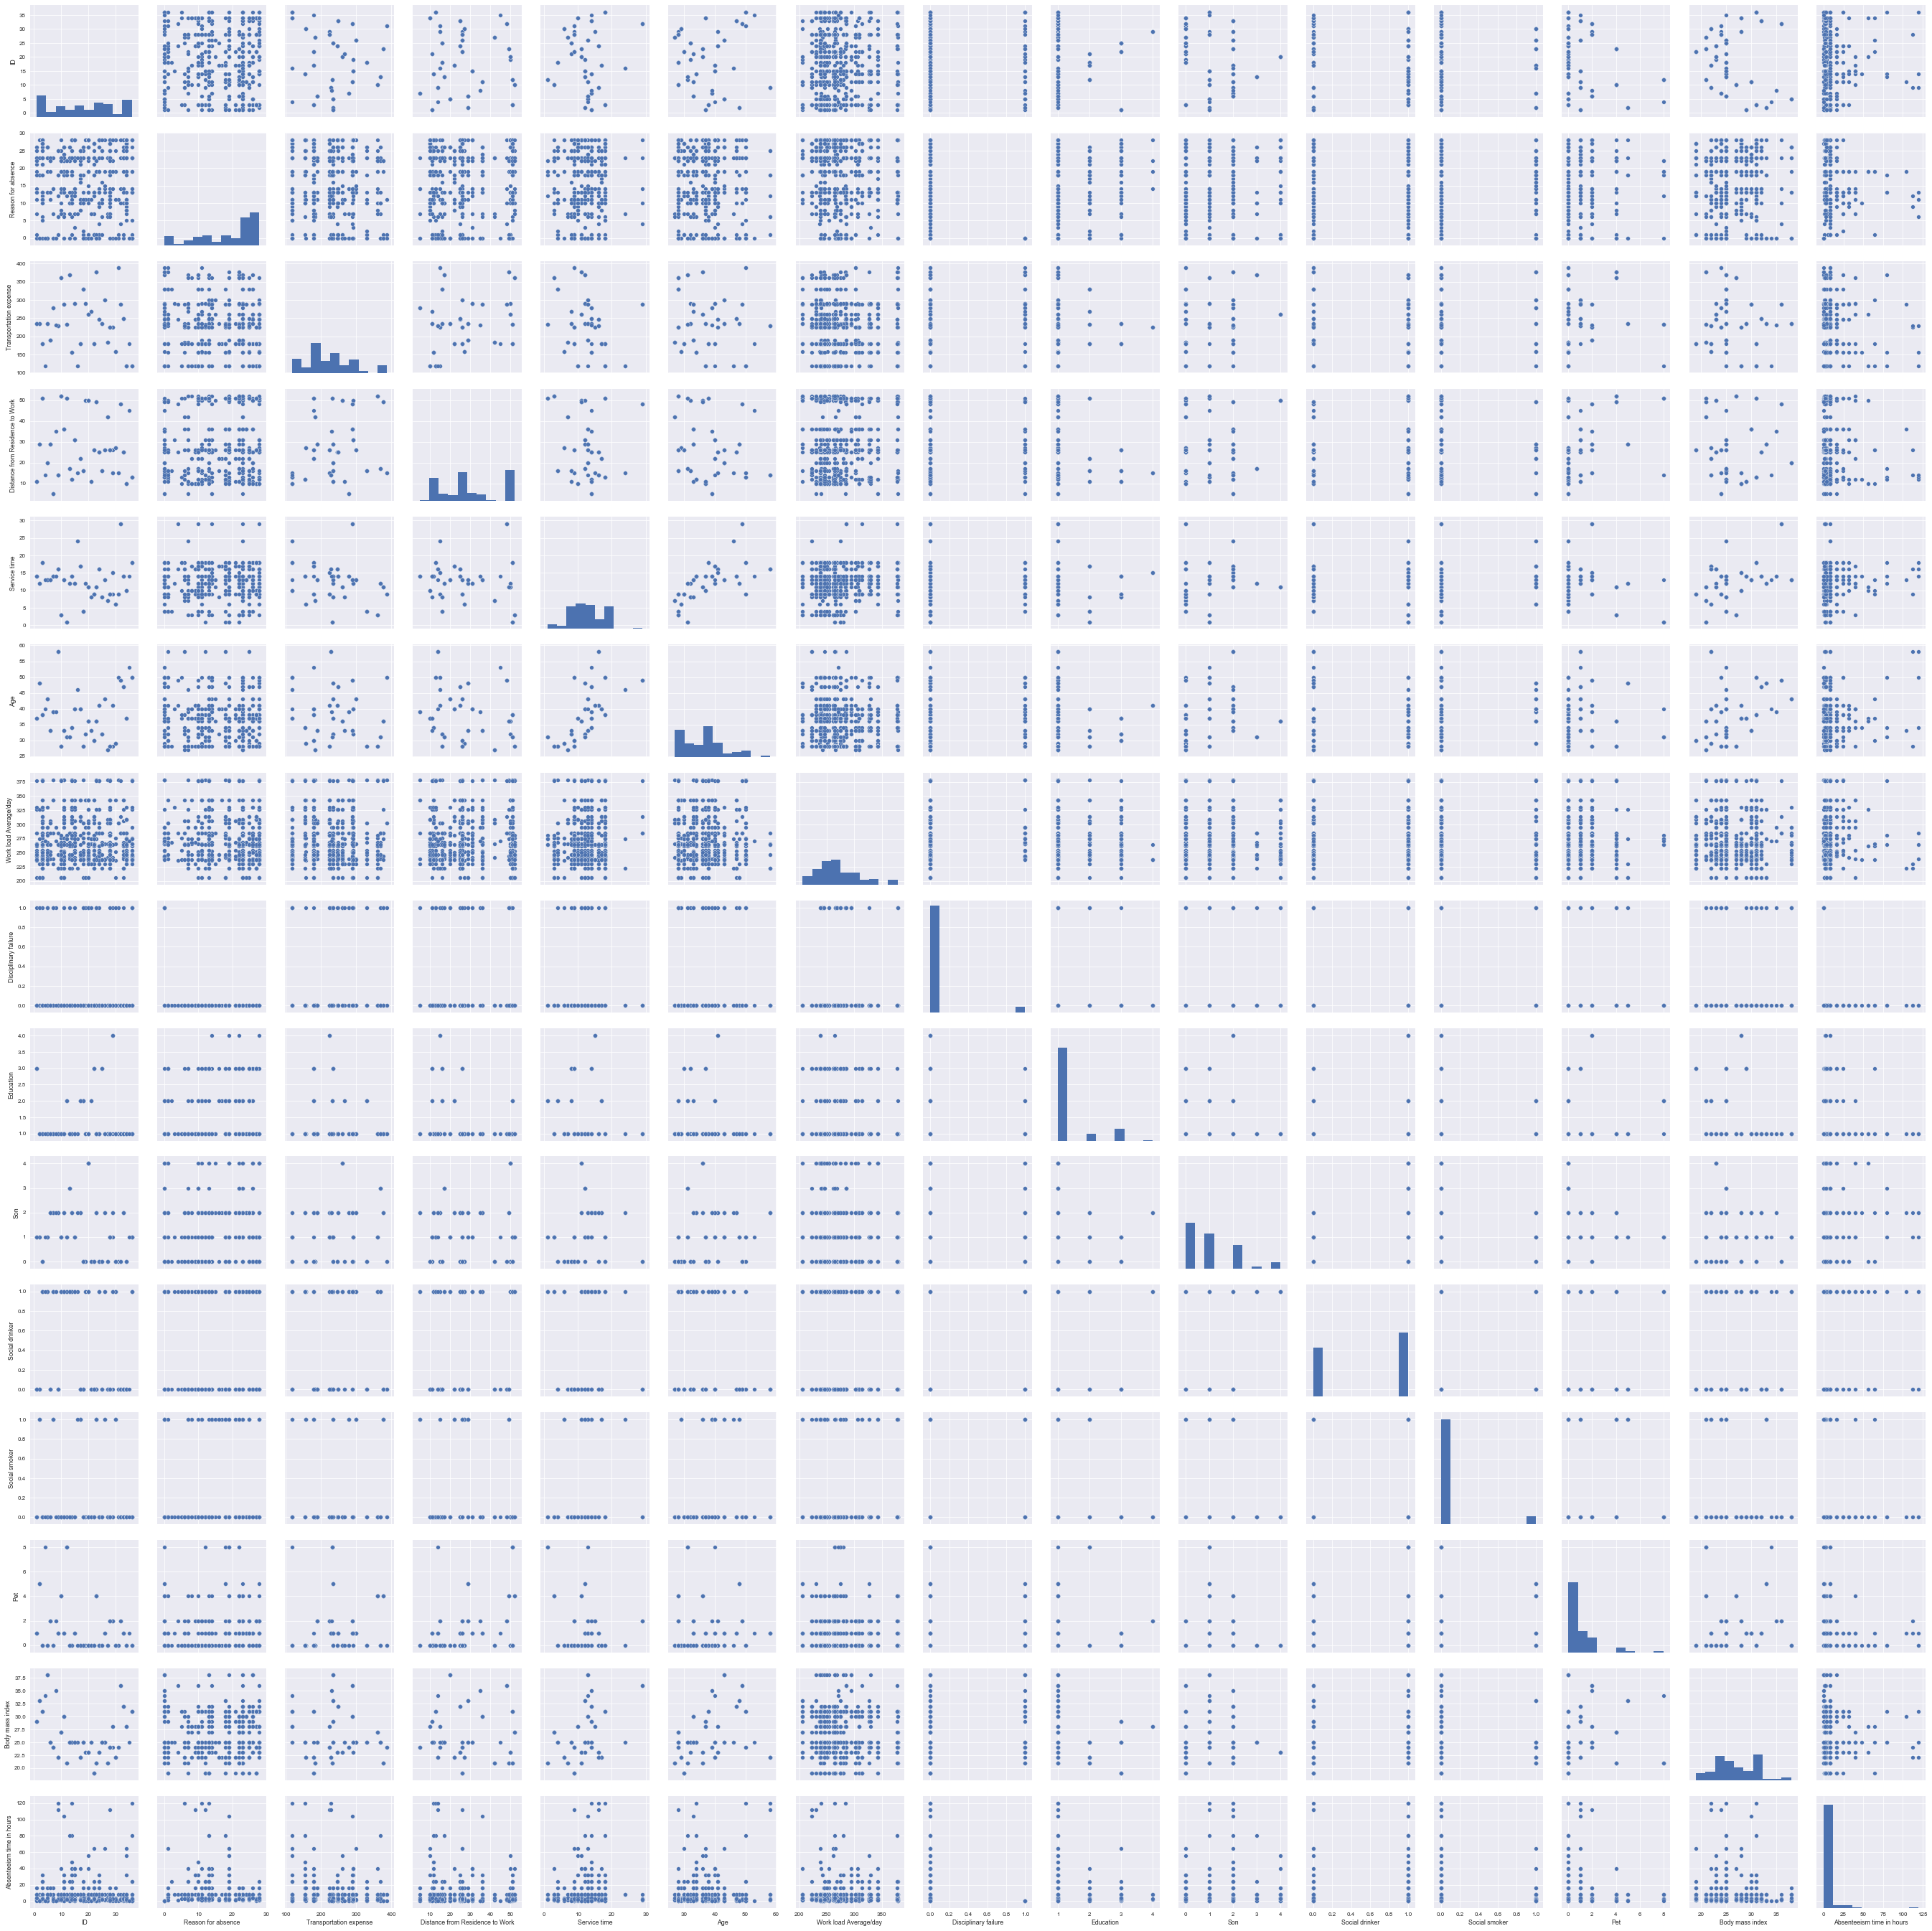

In [14]:
sns.pairplot(data)


# A bit of feature engineering!


In [15]:
Ab_data['Age Category'] = ['young employee' if 25<=age<=35 else 'mid age employee' if 36<=age<=45 else 'old employee' if age>=45 else None\
                      for age in list(Ab_data['Age'].values)  ] 
Ab_data['smoke_cat'] = ['no' if period<=0 else 'yes' if period >=1 else None \
                               for period in list (Ab_data['Social smoker'].values)]
Ab_data['absenteeism category'] = ['late' if period<=0 else 'very late' if 0<=period<=10 else 'extremely late' if period>=10 else None \
                               for period in list (Ab_data["Absenteeism time in hours"].values)]
Ab_data['Disciplinary cat'] = ['not taken' if period<=0 else 'taken' if period >=1 else None \
                               for period in list (Ab_data['Disciplinary failure'].values)]
Ab_data['drink_cat'] = ['no' if period<=0 else 'yes' if period >=1 else None \
                               for period in list (Ab_data['Social drinker'].values)]
Ab_data['Education_cat'] = ['high school' if  period ==1 else 'grudate' if  period ==2 else "postgraduate" if  period ==3 else 'doctor' if  period ==4 else  None \
                               for period in list (Ab_data['Education'].values)]
Ab_data['transportation category '] = ['cheap' if 100<=tfare<=200 else 'expensive' if 200<=tfare<=300 else 'very expensive' if tfare>300 else None \
                                   for tfare in list(Ab_data["Transportation expense"].values)]
Ab_data['distace category'] = ['close' if 0<=tfare<=15 else 'far' if 15<=tfare<=35 else 'very far' if tfare>35 else None \
                                   for tfare in list(Ab_data["Distance from Residence to Work"].values)]

In [16]:
Ab_data.head()

,ID,Reason for absence,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,Disciplinary failure,Education,Son,...,Body mass index,Absenteeism time in hours,Age Category,smoke_cat,absenteeism category,Disciplinary cat,drink_cat,Education_cat,transportation category,distace category
0,11,26,289,36,13,33,239.554,0,1,2,...,30,4,young employee,no,very late,not taken,yes,high school,expensive,very far
1,36,0,118,13,18,50,239.554,1,1,1,...,31,0,old employee,no,late,taken,yes,high school,cheap,close
2,3,23,179,51,18,38,239.554,0,1,0,...,31,2,mid age employee,no,very late,not taken,yes,high school,cheap,very far
3,7,7,279,5,14,39,239.554,0,1,2,...,24,4,mid age employee,yes,very late,not taken,yes,high school,expensive,close
4,11,23,289,36,13,33,239.554,0,1,2,...,30,2,young employee,no,very late,not taken,yes,high school,expensive,very far


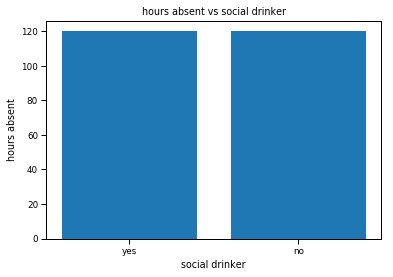

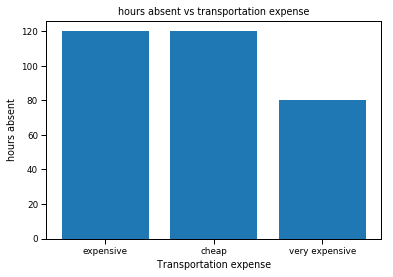

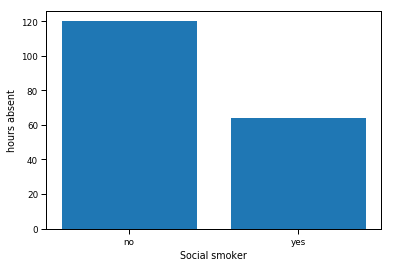

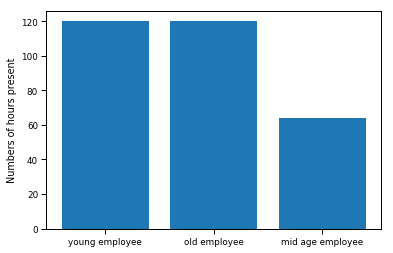

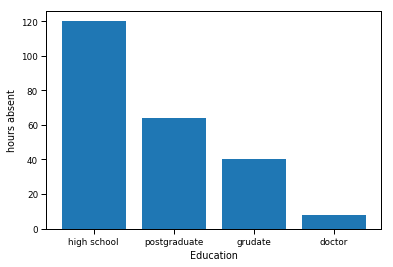

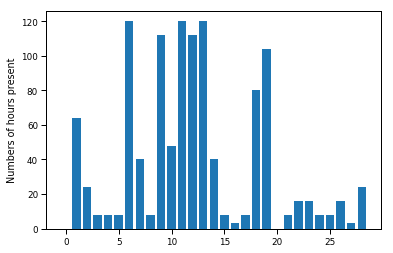

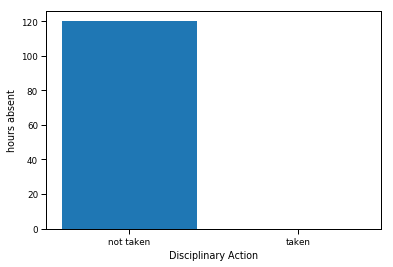

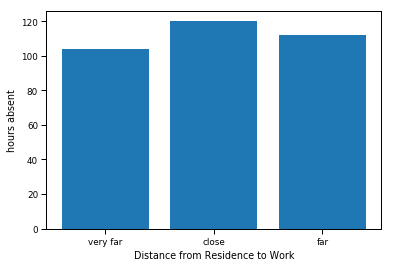

In [19]:
plt.bar(Ab_data['drink_cat'], Ab_data['Absenteeism time in hours']) 
plt.xlabel('social drinker')
plt.ylabel("hours absent")
plt.title('hours absent vs social drinker')
plt.show()
plt.bar(Ab_data['transportation category '], Ab_data['Absenteeism time in hours']) 
plt.xlabel('Transportation expense')
plt.ylabel("hours absent")
plt.title("hours absent vs transportation expense")
plt.show()
plt.bar(Ab_data['smoke_cat'], Ab_data['Absenteeism time in hours']) 
plt.xlabel('Social smoker')
plt.ylabel("hours absent")
plt.show()
plt.bar(Ab_data['Age Category'], Ab_data['Absenteeism time in hours'])
plt.ylabel("Numbers of hours present")
plt.show()
plt.bar(Ab_data['Education_cat'], Ab_data['Absenteeism time in hours']) 
plt.xlabel('Education')
plt.ylabel("hours absent")
plt.show()
plt.bar(Ab_data['Reason for absence'], Ab_data['Absenteeism time in hours'])
plt.ylabel("Numbers of hours present")
plt.show()
plt.bar(Ab_data['Disciplinary cat'], Ab_data['Absenteeism time in hours']) 
plt.xlabel('Disciplinary Action')
plt.ylabel("hours absent")
plt.show()
plt.bar(Ab_data['distace category'], Ab_data['Absenteeism time in hours']) 
plt.xlabel('Distance from Residence to Work')
plt.ylabel("hours absent")
plt.show()

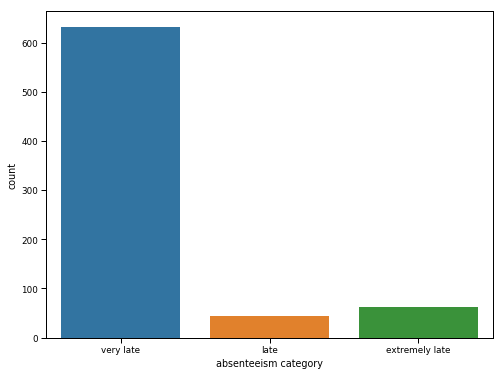

In [37]:
plt.figure(figsize=(8,6))
sns.countplot(x='absenteeism category',data=Ab_data)

In [23]:
Ab_data = Ab_data.drop([ 'ID','Age Category', 'Education_cat', 'transportation category ','Disciplinary cat','drink_cat','smoke_cat','Absenteeism time in hours'],axis=1,inplace=True)

In [24]:
Ab_data.head()

,Reason for absence,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Body mass index,absenteeism category,distace category
0,26,289,36,13,33,239.554,0,1,2,1,0,1,30,very late,very far
1,0,118,13,18,50,239.554,1,1,1,1,0,0,31,late,close
2,23,179,51,18,38,239.554,0,1,0,1,0,0,31,very late,very far
3,7,279,5,14,39,239.554,0,1,2,1,1,0,24,very late,close
4,23,289,36,13,33,239.554,0,1,2,1,0,1,30,very late,very far


# TRAIN TEST SPLIT

In [34]:
# split data into features and target

X = Ab_data[['Reason for absence', 'Social smoker', 'Pet','Distance from Residence to Work', 'Age', 'Social drinker','Body mass index', 'Education','Son' ]]
y=Ab_data['absenteeism category']

#train_test_split
from sklearn.model_selection import train_test_split

X_train, X_test,y_train, y_test= train_test_split (X,y,test_size=0.3,random_state=101)

From the Countplot above we can see that our target column is imbalanced, If we train a the classification model without fixing this problem, the model will be completely biased. therefore we would apply a samplig technique called oversampling,. the most commo oversampling technique is SMOTE (Synthetic Minority Over-sampling Technique). In simple terms, it looks at the feature space for the minority class data points and considers its k nearest neighbours.

In [38]:
X_train.shape,y_train.shape #checking the shape of our training set

((518, 9), (518,))

In [44]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(sampling_strategy='minority',random_state=7)
X_sm,y_sm = smote.fit_sample(X_train,y_train)

In [45]:
X_sm.shape,y_sm.shape  #checking the shape after oversampling

((926, 9), (926,))

# NAIVE BAYES

In [47]:
# Fitting Naive Bayes to the Training set
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_sm, y_sm)

GaussianNB(priors=None, var_smoothing=1e-09)

In [48]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)

In [49]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test,y_pred))

                precision    recall  f1-score   support

extremely late       0.31      0.24      0.27        21
          late       0.38      0.80      0.52        10
     very late       0.92      0.89      0.90       191

     micro avg       0.82      0.82      0.82       222
     macro avg       0.54      0.64      0.56       222
  weighted avg       0.84      0.82      0.83       222



In [50]:
from sklearn import metrics
def conftable(test,pred, imagename):
    confmatrix= metrics.confusion_matrix(y_test, y_pred)
    plt.matshow(confmatrix)
    plt.title('Confusion matrix')
    plt.colorbar()
    plt.ylabel('GroundTruth')
    plt.xlabel('Predicted')
    plt.savefig(imagename)
    
    plt.show()
    print(confmatrix)

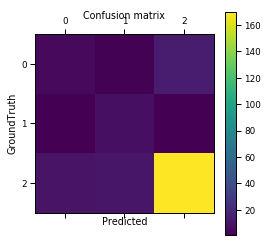

[[  5   2  14]
 [  1   8   1]
 [ 10  11 170]]


In [51]:
conftable(y_test,y_pred,"conf")

In [90]:
print("Accuracy: ", metrics.accuracy_score(y_test,y_pred))

Accuracy:  0.8243243243243243


# LOGISTIC REGRESSION

In [52]:
from sklearn.linear_model import LogisticRegression

In [53]:
logmodel = LogisticRegression(random_state = 0)

In [54]:
logmodel.fit(X_sm,y_sm)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=0, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [55]:
predictions = logmodel.predict(X_test)

In [56]:
from sklearn.metrics import classification_report, confusion_matrix

In [57]:
print(classification_report(y_test,predictions))

                precision    recall  f1-score   support

extremely late       0.00      0.00      0.00        21
          late       0.34      1.00      0.51        10
     very late       0.91      0.92      0.91       191

     micro avg       0.83      0.83      0.83       222
     macro avg       0.42      0.64      0.47       222
  weighted avg       0.80      0.83      0.81       222



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [58]:
from sklearn import metrics
def conftable(test,pred, imagename):
    confmatrix= metrics.confusion_matrix(y_test,predictions)
    plt.matshow(confmatrix)
    plt.title('Confusion matrix')
    plt.colorbar()
    plt.ylabel('GroundTruth')
    plt.xlabel('Predicted')
    plt.savefig(imagename)
    
    plt.show()
    print(confmatrix)

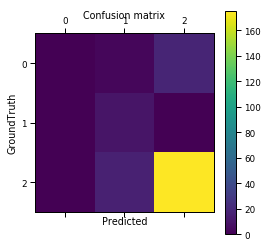

[[  0   3  18]
 [  0  10   0]
 [  0  16 175]]


In [59]:
conftable(y_test,predictions,"conf")

In [89]:
print("Accuracy: ", metrics.accuracy_score(y_test,predictions))

Accuracy:  0.8333333333333334


# USING SUPPORT VECTOR MACHINE

In [60]:
from sklearn.svm import SVC

In [61]:
svc = SVC()

In [62]:
svc.fit(X_sm,y_sm)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [63]:
pred = svc.predict(X_test)

In [64]:
print(classification_report(y_test,pred))

                precision    recall  f1-score   support

extremely late       0.50      0.10      0.16        21
          late       0.44      0.40      0.42        10
     very late       0.89      0.97      0.92       191

     micro avg       0.86      0.86      0.86       222
     macro avg       0.61      0.49      0.50       222
  weighted avg       0.83      0.86      0.83       222



In [85]:
from sklearn import metrics
def conftable(test,pred, imagename):
    confmatrix= metrics.confusion_matrix(y_test,pred)
    plt.matshow(confmatrix)
    plt.title('Confusion matrix')
    plt.colorbar()
    plt.ylabel('GroundTruth')
    plt.xlabel('Predicted')
    plt.savefig(imagename)
    
    plt.show()
    print(confmatrix)

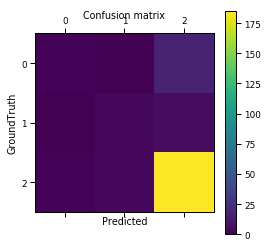

[[  2   1  18]
 [  0   4   6]
 [  2   4 185]]


In [88]:
conftable(y_test,pred,"conf")

In [87]:
print("Accuracy: ", metrics.accuracy_score(y_test,pred))

Accuracy:  0.8603603603603603


# RANDOM FOREST CLASSIFIER

In [74]:
from sklearn.ensemble import RandomForestClassifier

In [75]:
rfc = RandomForestClassifier(n_estimators=1000,criterion = 'entropy')

In [77]:
rfc.fit(X_sm,y_sm)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [78]:
pred_ = rfc.predict(X_test)

In [79]:
print(classification_report(y_test,pred_))

                precision    recall  f1-score   support

extremely late       0.43      0.29      0.34        21
          late       1.00      1.00      1.00        10
     very late       0.92      0.96      0.94       191

     micro avg       0.90      0.90      0.90       222
     macro avg       0.78      0.75      0.76       222
  weighted avg       0.88      0.90      0.89       222



In [80]:
from sklearn import metrics
def conftable(test,pred, imagename):
    confmatrix= metrics.confusion_matrix(y_test,pred_)
    plt.matshow(confmatrix)
    plt.title('Confusion matrix')
    plt.colorbar()
    plt.ylabel('GroundTruth')
    plt.xlabel('Predicted')
    plt.savefig(imagename)
    
    plt.show()
    print(confmatrix)

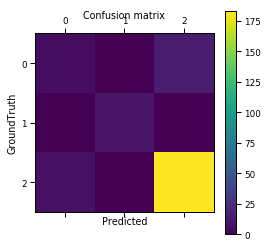

[[  6   0  15]
 [  0  10   0]
 [  8   0 183]]


In [81]:
conftable(y_test,pred_,"conf")

In [83]:
print("Accuracy: ", metrics.accuracy_score(y_test,pred_))

Accuracy:  0.8963963963963963


# Thank you!